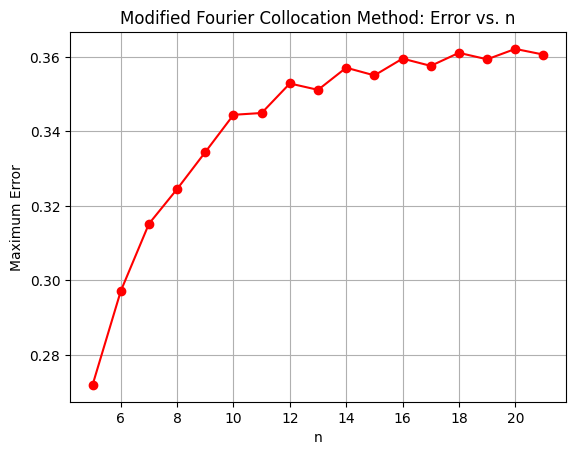

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def compute_positive_fourier_coefficients(f, n):
    """计算傅立叶系数（仅正频率）"""
    x = np.linspace(0, 2*np.pi, n, endpoint=False)
    f_values = f(x)
    f_coeffs = np.zeros(n, dtype=complex)
    for k in range(0, n):
        f_coeffs[k] = np.sum(f_values * np.exp(-1j * k * x)) / n
    return f_coeffs

def positive_fourier_series(coeffs, x):
    """傅立叶级数（仅正频率）"""
    sum = np.zeros_like(x, dtype=complex)
    for k, coeff in enumerate(coeffs):
        sum += coeff * np.exp(1j * k * x)
    return sum

def solve_modified_differential_equation(f, n):
    """求解修改后的微分方程"""
    f_coeffs = compute_positive_fourier_coefficients(f, n)
    u_coeffs = np.array([f_k / (k**2 + 1) if k != 0 else f_k for k, f_k in enumerate(f_coeffs)])
    return u_coeffs

def exact_solution(x):
    """精确解"""
    return np.sin(x) / (2 + np.cos(x))

def f_example(x):
    """算例的f(x)"""
    return (2 * np.sin(x) / (2 + np.cos(x)) 
            - 2 * np.sin(x)**3 / (2 + np.cos(x))**3 
            - 3 * np.sin(x) * np.cos(x) / (2 + np.cos(x))**2)

# 不同的n值
n_values_modified = range(5, 22)
errors_modified = []

for n in n_values_modified:
    x = np.linspace(0, 2*np.pi, n, endpoint=False)
    u_coeffs = solve_modified_differential_equation(f_example, n)
    u_approx = positive_fourier_series(u_coeffs, x)
    error = np.max(np.abs(u_approx - exact_solution(x)))
    errors_modified.append(error)

# 绘制修改后的误差图
plt.plot(n_values_modified, errors_modified, marker='o', color='red')
plt.xlabel('n')
plt.ylabel('Maximum Error')
plt.title('Modified Fourier Collocation Method: Error vs. n')
plt.grid(True)
plt.show()

